# Predicting sale price of Bulldozer sold at auctions using Machine Learning 

In this notebook, we are going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its chracteristics and previous examples of how much similar bulldozers have been sold for? 

## 2. Data

The three data set available are:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set. 

> The data we are using were already downloaded from Kaggle Bluebook for Bulldozers competition. The source of the data is: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. For more on evaluation of this project check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

>**Note**: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this  project will be to build a machine learning model which minimises the RMSLE.

## 4. Features

Kaggle provides a data dictionary of details of all the features of the dataset. You can view this data dictionary on Google sheets: https://docs.google.com/spreadsheets/d/1DtmBZsmHnKbAJbSWvOfN4Yyk-GijvJhM4oepIpEfx_g/edit#gid=2070077111

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn 
import warnings
warnings.filterwarnings("ignore")

## Now let's start EDA

This is done by plot or relating any of the important columns with the target column using any means possible

In [2]:
# Import training and evaluation data
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [4]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [5]:
# Let's check the columns we have in the data table 
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

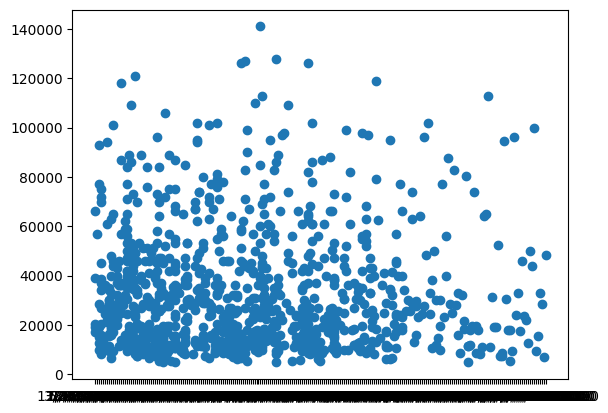

In [6]:
# We can look for a contributing feature and relate it to the target feature using a scatter plot
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

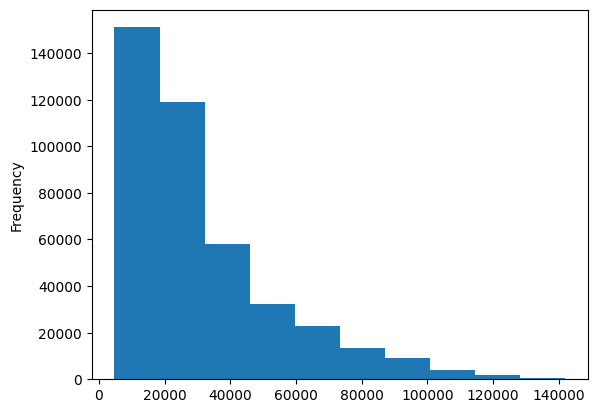

In [7]:
df.SalePrice.plot.hist();

**Parsing Dates**

When we work with time series data, we want to enrich the time and date component as much as possible. We can do that by telling pandas which of our columns has date in it using the 'parse-date' parameter. This will reformat the data to a more better form.

In [8]:
df.saledate.dtypes

dtype('O')

In [9]:
df.saledate # This is the default saledate format of the dataset we are working on 

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [10]:
# Now lets import the data using the parsing approach on the saledate
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", parse_dates=["saledate"])

# The parse_dates help to reformat the date into something better formatted

In [11]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [12]:
df.saledate.dtypes

dtype('<M8[ns]')

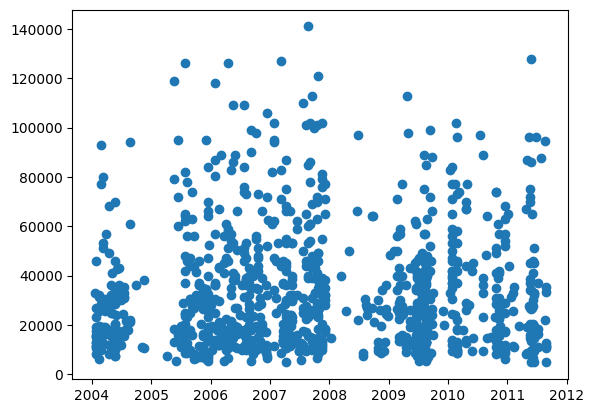

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

# The saledate axis of the plot below is better formatted than the one 
# we have above plotted using the default saledate format

In [14]:
len(df)

412698

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


**Sorting DataFrame by saletdate**

This is a good practice when working with time series data/problem. Timeseries data always involve using past event data to predict future events.


In [17]:
# Sort DataDrame in date order 
# This will set the data base on increase data order

df.sort_values(by=["saledate"], inplace=True, ascending=True) 
# This sorting by date can only take place when the date is already better formatted using the parse_date

df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


**Make a copy of the original data before you start making further analysis**

In [19]:
# Let's make a copy of the original data
df_copy = df.copy()

In [20]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_copy[:3].saledate.dt.year # The dt.year is pandas datetime format 

205615    1989
274835    1989
141296    1989
Name: saledate, dtype: int64

In [22]:
df_copy[:3].saledate.dt.day

205615    17
274835    31
141296    31
Name: saledate, dtype: int64

In [23]:
df_copy[:2].saledate.dt.month

205615    1
274835    1
Name: saledate, dtype: int64

In [24]:
df_copy[:2].saledate

205615   1989-01-17
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [25]:
# Let's add some new columns of data to our data frame 
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayOfYear"] = df_copy.saledate.dt.dayofyear

df_copy.drop("saledate", axis=1, inplace=True)

In [26]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [27]:
# Check the values of sales of different columns 
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA

In [28]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

In [29]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [30]:
# Let's split the data into features and labels 
x = df_copy.drop("SalePrice", axis=1)
y = df_copy["SalePrice"]

In [31]:
# We need to import a model to train it using the data 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Low'

This will give error because we have not made all the data floats or integers. 
Moreover, we have some NAN value in our data and the model can't work with empty portion of the data unless they are filled or removed

In [32]:
# Let us check for the columns that are strings and work on them 
pd.api.types.is_numeric_dtype(df_copy["UsageBand"])
# This will print True because it is a string

False

In [33]:
# We need to check for the strings in the entire dataframe
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


All the above column names/keys are strings

In [34]:
# We need to turn the stings to categories
# The below lines of code will turn all of the string value into category values

for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()
        
# We need to make the string data category because this will help 
# pandas to assign numerical values to them
# if left in stings the vonversion won't be easy at all 

In [35]:
# The info() funtion will reveal the current state of the data now 
df_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df_copy.state.cat.codes 
# here the categories are given integer values by pandas. The integer is better for machine than objects

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [38]:
df_copy.isna().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [39]:
# When working on data, its better to save the file as csv for progress check
# Export current copy dataframe 

df_copy.to_csv("data/bluebook-for-bulldozers/new_df_copy.csv", index=False)

In [40]:
# Let's export it back to see how it is formatted
df_new = pd.read_csv("data/bluebook-for-bulldozers/new_df_copy.csv")
df_new.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [41]:
df_new.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing value

In [42]:
# The below lines of code helps us to know the columns that are numeric
for label, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [43]:
df_new.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [44]:
# We need to know the numeric columns with the missing values

for label, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [45]:
# Fill numeric columns with the median
for label, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if the data was missing or not
            df_new[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric value with median
            df_new[label] = content.fillna(content.median())

In [46]:
# After the above code we need to confirm if what we have done made effect 
for lable, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            
# This does not print anything because there is no more missing value in the dataframe again 

In [47]:
# Check to see how many examples were missing 
df_new.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [48]:
df_new.MachineHoursCurrentMeter_is_missing.value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [49]:
df_new.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers 


In [50]:
# Check for columns which aren't numeric 
for label, content in df_new.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [51]:
# Below is an example of how we can turn categorical data into numbers 
pd.Categorical(df_new["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [52]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_new.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had a missing value
        df_new[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_new[label] = pd.Categorical(content).codes + 1
        # The reason for the 1 is because categorical always make missing values -1, so the +1 solves the issue 
        

In [53]:
pd.Categorical(df_new["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [54]:
pd.Categorical(df_new["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [55]:
# Lets check the categorical columns that are empty
df_new.head().T
# Thare are the ones that have True. At this point empty column will be fill with 0

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [56]:
df_new.isna().sum()
# You will find out that there are no more missing values in the dataframe nay more
# Also all the data are all numeric and no more objects can be founf=d in our data 

# WOWWWWWWWWWWWWWWWWWWW

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model 

In [57]:
df_new.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(5), int64(10), int8(39)
memory usage: 78.3 MB


In [59]:
# Let's find the features(x) and the label(y)

x = df_new.drop("SalePrice", axis=1)
y = df_new["SalePrice"]


In [60]:
%%time 
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42) 
# The -1 means use all processor. Check documentation
model.fit(x, y)


CPU times: total: 19min 20s
Wall time: 10min 16s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model()

In [61]:
model.score(x, y)

0.9875516841918182

**Question:** Why doesnt the above metric hold water? (why isnt the metrics reliable)

#### Splitting the data into train/validation set

In [62]:
df_new.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [63]:
df_new.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [64]:
# Now let's get the trained data and validation data from the downloaded file 
df_val = df_new[df_new.saleYear == 2012]
df_train = df_new[df_new.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [65]:
# Split data into x and y 
x_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

# Let's check the shape
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [66]:
# Now the saling price is 
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building a custom evaluation function


In [67]:
# Create evaluation function (the competition uses RMSLE)
# This will help to check all the 
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
# absolute means a portion
# log means ratio
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between oredictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluae model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {
        "Training MAE" : mean_absolute_error(y_train, train_preds), 
        "Valid MAE" : mean_absolute_error(y_valid, val_preds),
        "Training RMSLE" : rmsle(y_train, train_preds),
        "Valid RMSLE" : rmsle(y_valid, val_preds),
        "Training R^2" : r2_score(y_train, train_preds),
        "Valid R^s" : r2_score(y_valid, val_preds)
    }
    return scores 

check this link: https://scikit-learn.org/stable/modules/model_evaluation.html

In [68]:
# # This below model fitting process will take a while before it is completed

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(x_train, y_train)

In [69]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [70]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train, y_train)


CPU times: total: 35.5 s
Wall time: 18 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [71]:
show_scores(model)

{'Training MAE': 5561.162486855717,
 'Valid MAE': 7175.539684610732,
 'Training RMSLE': 0.2577413666148792,
 'Valid RMSLE': 0.29362620003305046,
 'Training R^2': 0.8606724557441926,
 'Valid R^s': 0.8320287347586728}

### Hyperparameter tunning with RandomizedSearchCV

In [112]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

# Instantiate RandomSearchCV model 
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)
                              
                              

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 13.5 s
Wall time: 45.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [73]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [74]:
show_scores(rs_model)

{'Training MAE': 8770.187883797875,
 'Valid MAE': 10401.70515294704,
 'Training RMSLE': 0.38441801671052717,
 'Valid RMSLE': 0.4128561304046909,
 'Training R^2': 0.6907847387637446,
 'Valid R^s': 0.6840971148223229}

### Train a model with the best hyperparameters 
**Note**: These were found after 100 ietrations of 'RandomizedSearchCv'

In [117]:
rs_model.best_params_
rs_model()

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [75]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=1,
                                    max_samples=None,
                                    random_state=42)

# Fit the ideal model 
ideal_model.fit(x_train, y_train)

CPU times: total: 2min 52s
Wall time: 3min 38s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=1, random_state=42)

In [76]:
show_scores(ideal_model)

{'Training MAE': 2951.5558873978152,
 'Valid MAE': 5953.396556983143,
 'Training RMSLE': 0.14464014469574377,
 'Valid RMSLE': 0.24495161621547118,
 'Training R^2': 0.9588560332057796,
 'Valid R^s': 0.8814901850998738}

In [77]:
## Using our ideal model to make predictions on the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [78]:
# Make prediction on the test data set 
test_preds = ideal_model.predict(df_test)
# This will give an error because many of the data set are still objects

ValueError: could not convert string to float: 'Low'

**To correct the error above, we need to now work on the Test data as we did previously on the TrainAndValid data set**

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [79]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df
    
    

In [80]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [81]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [82]:
# We can find how the columns differs using sets
set(x_train.columns) - set(df_test.columns)


{'auctioneerID_is_missing'}

In [83]:
# We can find how column differs using sets
set(x_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [84]:
# W need to manually adjust df_test to have auctioneerID_is_missing column 
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test dataframe has the same features as our training dataframe, we can make predictions!

In [85]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [86]:
test_preds

array([24462.01228979, 20192.21245844, 49565.81741961, ...,
       14987.49962306, 20565.8347001 , 28597.54658831])

In [87]:
len(test_preds)

12457

We have indeed made some predictions but they are not in the same format as expected by kaggle https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [88]:
# Format predictions into the same format Kaggle wants 
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,24462.012290
1,1227844,20192.212458
2,1227847,49565.817420
3,1227848,66350.008636
4,1227863,40544.256684
...,...,...
12452,6643171,40393.519516
12453,6643173,16968.419199
12454,6643184,14987.499623
12455,6643186,20565.834700


In [89]:
# Exporting prediction data 
df_preds.to_csv("data/bluebook-for-bulldozers/predicted_results.csv", index=False)

In [90]:
# Importing the csv file
data_frame = pd.read_csv("data/bluebook-for-bulldozers/predicted_results.csv")

In [91]:
data_frame

,SalesID,SalesPrice
0,1227829,24462.012290
1,1227844,20192.212458
2,1227847,49565.817420
3,1227848,66350.008636
4,1227863,40544.256684
...,...,...
12452,6643171,40393.519516
12453,6643173,16968.419199
12454,6643184,14987.499623
12455,6643186,20565.834700


### Feature Importance 

Feature importance seeks to figure out whicjh different attributes of the data were most important when it comes to predicting the **target variable**

Search for the feature imortance of the model

In [92]:
ideal_model.feature_importances_

array([3.45667476e-02, 1.76864805e-02, 4.12009944e-02, 1.72439057e-03,
       3.34334858e-03, 2.10787844e-01, 2.89687255e-03, 1.06913638e-03,
       4.48792212e-02, 4.32866600e-02, 6.41521952e-02, 4.47987531e-03,
       1.63045546e-02, 1.51122293e-01, 4.79030975e-02, 5.93879595e-03,
       1.59049463e-03, 9.90477929e-04, 2.41820444e-03, 5.83958683e-02,
       7.91054993e-04, 7.11318723e-05, 9.14740736e-04, 2.11047000e-04,
       1.05006744e-03, 1.97881148e-05, 2.06729210e-03, 4.21970688e-03,
       2.12243114e-03, 2.55461284e-03, 4.51675340e-03, 3.66526814e-03,
       4.34506157e-03, 5.32852158e-04, 2.73018685e-04, 9.04284048e-03,
       7.88124554e-04, 1.76525873e-02, 1.02960957e-03, 2.38938234e-03,
       1.06344072e-03, 8.34127061e-04, 1.77945873e-03, 6.05591145e-04,
       5.14902991e-04, 3.69866022e-04, 5.78913107e-04, 2.71100491e-03,
       1.20868637e-03, 2.75966587e-04, 1.88531317e-04, 7.37953913e-02,
       3.80430605e-03, 5.59764239e-03, 2.88044969e-03, 9.82234660e-03,
      

In [93]:
len(ideal_model.feature_importances_)

102

In [95]:
x_train.shape

(401125, 102)

In [96]:
index = x_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [101]:
pd.DataFrame(index=[index], data=x_train)

NameError: name 'index' is not defined

In [109]:
# Helper function for plotting features importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                 "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    

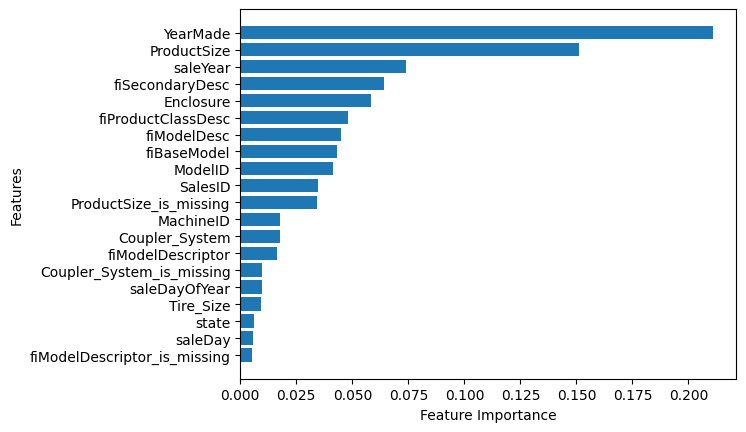

In [110]:
plot_features(x_train.columns, ideal_model.feature_importances_)

### The most important feature as shown in the plot above is the YearMade

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?
    
**Final Challenge:** What other machine learning models could you try on our dataset?

Check out the regression section of the scikit-learn model map, or try something like CatBoost.ai or XGBoost.ai